Working with text
=================

This is a version of the tutorial "Working with text" (https://de.dariah.eu/tatom/working_with_text.html) in the form of an interactive IPython notebook. This document is "live"; any code example can be edited and executed in the browser. To see this in action, change some part of the code in the *cell* below and then click on the play button above.

In [1]:
list_of_strings = ['working', 'with', 'text']
for s in list_of_strings:
    print(s)

working
with
text


Creating a document-term matrix
-------------------------------

Word frequencies and document-term matrices are typical units of
analysis when working with text collections. It may come as a surprise
that reducing a book to a list of word frequencies retains useful
information, but practice has shown this to be the case. Treating texts
as a list of word frequencies (a vector) also makes available a range of
mathematical tools developed for [studying and manipulating
vectors](http://en.wikipedia.org/wiki/Euclidean_vector#History).

> **Note**: Turning texts into unordered lists (or "bags") of words is easy in
> Python. [Python Programming for the
> Humanities](http://fbkarsdorp.github.io/python-course/) includes a
> chapter entitled [Text
> Processing](http://nbviewer.ipython.org/urls/raw.github.com/fbkarsdorp/python-course/master/Chapter%203%20-%20Text%20Preprocessing.ipynb)
> that describes the steps in detail.

This document assumes some prior exposure to text analysis so we will
gather word frequencies (or term frequencies) derived from the lists of
words appearing in texts into a document-term matrix using the
[CountVectorizer](http://scikit-learn.sourceforge.net/dev/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
class from the [scikit-learn](http://scikit-learn.sourceforge.net/)
package. (For those familiar with R and the
[tm](http://cran.r-project.org/web/packages/tm/) package, this function
performs the same operation as `DocumentTermMatrix` and takes
recognizably similar arguments.)

First we need to import the functions and classes we intend to use,
along with our customary abbreviation for functions in the `numpy`
package.

In [2]:
import numpy as np  # a conventional alias
from sklearn.feature_extraction.text import CountVectorizer

Now we use the
[CountVectorizer](http://scikit-learn.sourceforge.net/dev/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
class to create a document-term matrix. `CountVectorizer` is highly
customizable. For example, a list of "stop words" can be specified with
the ``stop_words`` parameter. Other important parameters include:

-   `lowercase` (default `True`) convert all text to lowercase before
    tokenizing
-   `min_df` (default `1`) remove from the vocabulary terms that occur
    in fewer than `min_df` documents–with a large corpus this may be set
    to `5` to eliminate rare words
-   `vocabulary` ignore words that do not appear in the list (or
    iterable) assigned to parameter `vocabulary`
-   `strip_accents` remove accents
-   `token_pattern` (default `u'(?u)\b\w\w+\b'`) regular expression
    identifying tokens–by default words that consist of a single
    character (e.g., 'a', '2') are ignored, setting `token_pattern` to
    `'(?u)\b\w+\b'` will include these tokens
-   `tokenizer` (default unused) use a custom function for tokenizing

For this example we will use texts by Jane Austen and Charlotte Brontë. These
texts are available in the *Datasets* section of the collected tutorials.


In [25]:
filenames = ['data/austen-brontë/Austen_Emma.txt',           
             'data/austen-brontë/Austen_Pride.txt',          
             'data/austen-brontë/Austen_Sense.txt',          
             'data/austen-brontë/CBronte_Jane.txt',          
             'data/austen-brontë/CBronte_Professor.txt',     
             'data/austen-brontë/CBronte_Villette.txt']      
                                                             
vectorizer = CountVectorizer(input='filename')               
dtm = vectorizer.fit_transform(filenames)  # a sparse matrix 
vocab_list = vectorizer.get_feature_names()

Now we have a document-term matrix and a vocabulary list. Before we can
query the matrix and find out, for example, how many times the word
'house' occurs in *Emma* (the first text in `filenames`), we need to
convert this matrix from its current format, a [sparse
matrix](http://docs.scipy.org/doc/scipy/reference/sparse.html), into a
normal NumPy array. We will also convert `vocab`, a list of vocabulary,
to an array of strings, as an array supports a greater variety of
operations.


In [26]:
# for reference, note the current class of `dtm`  
type(dtm)                                         
dtm = dtm.toarray()  # convert to a regular array 
vocab = np.array(vocab_list)

> **Note:** A sparse matrix is used to store matrices that contain a significant
> number of entries that are zero. Typically, a sparse matrix only
> records non-zero entries. To understand why this matters so much
> that `CountVectorizer` returns a sparse matrix by default,
> consider a 4000 by 50000 matrix that is 60% zeros. In Python an
> integer takes up 4 bytes, so using a sparse matrix saves almost
> 500M, which is a significant amount of computer memory. (Remember
> that arrays are usually stored in memory, not on disk).

Querying the document-term matrix and the vocabulary is straightforward.
For example, here are two ways of finding how many times the word
'house' occurs in the first text, *Emma*:


In [5]:
# the first file, indexed by 0 in Python, is *Emma*                 
filenames[0] == 'data/austen-brontë/Austen_Emma.txt'                
                                                                    
# use the standard Python list method index(...)                    
house_idx = vocab_list.index('house')                               
dtm[0, house_idx]                                                   
                                                                    
# alternatively, use NumPy indexing                                 
# in R this would be essentially the same, dtm[1, vocab == 'house'] 
dtm[0, vocab == 'house']                                         

array([95], dtype=int64)

In [6]:
# verify that this is the result we anticipated
vocab[house_idx]

'house'

Sandbox
=======
Feel free to experiment with the document-term matrix `dtm` in the code cells below.

In [7]:
print(dtm.shape)
for fn in filenames:
    print(fn)

(6, 22854)
data/austen-brontë/Austen_Emma.txt
data/austen-brontë/Austen_Pride.txt
data/austen-brontë/Austen_Sense.txt
data/austen-brontë/CBronte_Jane.txt
data/austen-brontë/CBronte_Professor.txt
data/austen-brontë/CBronte_Villette.txt


In [8]:
print(len(vocab))
vocab[500:550]  # look at some of the vocabulary

22854


array(['abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abyss',
       'acacia', 'acacias', 'academician', 'academicians', 'accede',
       'acceded', 'acceding', 'accelerate', 'accelerated', 'accent',
       'accented', 'accents', 'accentuated', 'accept', 'acceptable',
       'acceptably', 'acceptance', 'accepted', 'accepting', 'accepts',
       'access', 'accessible', 'accession', 'accessory', 'accident',
       'accidental', 'accidentally', 'accidently', 'accidents',
       'accommodate', 'accommodated', 'accommodating', 'accommodation',
       'accommodations', 'accompanied', 'accompanies', 'accompaniment',
       'accompaniments', 'accompany', 'accompanying', 'accompli',
       'accomplices', 'accomplish', 'accomplished'], dtype='<U20')

### Calculating distance matrix "by hand"

In [9]:
n, _ = dtm.shape

dist = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        x, y = dtm[i, :], dtm[j, :]
        dist[i, j] = np.sqrt(np.sum((x - y)**2))

np.round(dist, 1)

array([[   0. , 3856.3, 4182.8, 5119.7, 7113.3, 5280.2],
       [3856.3,    0. , 1922.6, 6313.1, 4126.2, 6381.2],
       [4182.8, 1922.6,    0. , 6657.4, 4045.3, 6650.3],
       [5119.7, 6313.1, 6657.4,    0. , 8363.8, 2591.5],
       [7113.3, 4126.2, 4045.3, 8363.8,    0. , 8484.1],
       [5280.2, 6381.2, 6650.3, 2591.5, 8484.1,    0. ]])

### Euclidean distance

In [10]:
from sklearn.metrics.pairwise import euclidean_distances

dist = euclidean_distances(dtm)

np.round(dist, 1)

array([[   0. , 3856.3, 4182.8, 5119.7, 7113.3, 5280.2],
       [3856.3,    0. , 1922.6, 6313.1, 4126.2, 6381.2],
       [4182.8, 1922.6,    0. , 6657.4, 4045.3, 6650.3],
       [5119.7, 6313.1, 6657.4,    0. , 8363.8, 2591.5],
       [7113.3, 4126.2, 4045.3, 8363.8,    0. , 8484.1],
       [5280.2, 6381.2, 6650.3, 2591.5, 8484.1,    0. ]])

In [11]:
print(filenames[1])

print(filenames[3])

print("Distance between 1 and 3: %.2f" % dist[1, 3])

data/austen-brontë/Austen_Pride.txt
data/austen-brontë/CBronte_Jane.txt
Distance between 1 and 3: 6313.08


### Cosine similarity

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(dtm)

np.round(dist, 2)

array([[-0.  ,  0.02,  0.03,  0.05,  0.06,  0.05],
       [ 0.02, -0.  ,  0.02,  0.05,  0.04,  0.04],
       [ 0.03,  0.02, -0.  ,  0.06,  0.05,  0.05],
       [ 0.05,  0.05,  0.06,  0.  ,  0.02,  0.01],
       [ 0.06,  0.04,  0.05,  0.02, -0.  ,  0.01],
       [ 0.05,  0.04,  0.05,  0.01,  0.01,  0.  ]])

### Normalization

In [13]:
norms = np.sqrt(np.sum(dtm * dtm, axis=1, keepdims=True))

dtm_normed = dtm / norms

similarities = np.dot(dtm_normed, dtm_normed.T)

np.round(similarities, 2)

array([[1.  , 0.98, 0.97, 0.95, 0.94, 0.95],
       [0.98, 1.  , 0.98, 0.95, 0.96, 0.96],
       [0.97, 0.98, 1.  , 0.94, 0.95, 0.95],
       [0.95, 0.95, 0.94, 1.  , 0.98, 0.99],
       [0.94, 0.96, 0.95, 0.98, 1.  , 0.99],
       [0.95, 0.96, 0.95, 0.99, 0.99, 1.  ]])

### MDS projection in 2D

In [14]:
import os
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)

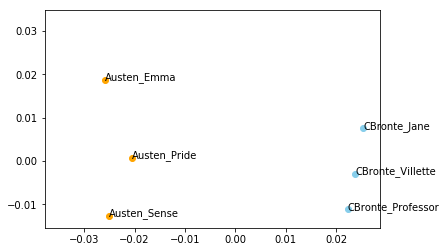

In [15]:
xs, ys = pos[:, 0], pos[:, 1]

names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]

for x, y, name in zip(xs, ys, names):
    color = 'orange' if "Austen" in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)

plt.show()

### MDS projection in 3D

In [16]:
mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)

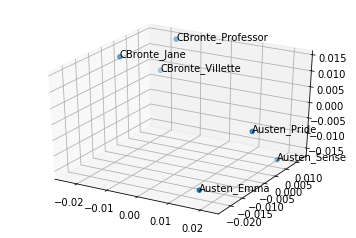

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])

for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
    ax.text(x, y, z, s)

plt.show()

### Clustering texts based on distance

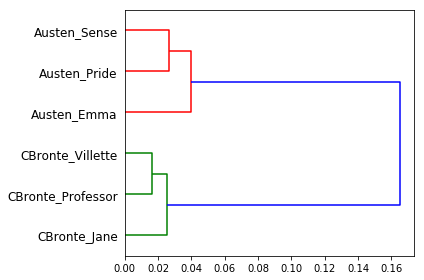

In [18]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist)

dendrogram(linkage_matrix, orientation="right", labels=names)

plt.tight_layout()

plt.show()